In [2]:
import numpy as np
import numpy.linalg as la

In [3]:
file = open("md-data.txt")
data = np.genfromtxt(file, delimiter=",")
data = np.matrix(data).T
file.close()

In [4]:
d = data.shape[0]
n = data.shape[1]

In [5]:
print(d); print(n)

11
30


### Standardize each variable to have a mean of 0 and a standard deviation of 1:

In [6]:
mean = np.mean(data, 1) ; #mean

In [7]:
sdata = data - mean;
np.mean(sdata, 1)

matrix([[ 2.96059473e-17],
        [ 9.62193288e-17],
        [ 4.25585493e-17],
        [-8.78926561e-18],
        [ 1.03620816e-16],
        [-1.85037171e-18],
        [ 4.71844785e-17],
        [-5.08852220e-18],
        [-2.22044605e-17],
        [-2.77555756e-17],
        [-2.22044605e-17]])

### Compute the covariance matrix of the shifted data points:

In [8]:
cov = np.cov(sdata, None, 1, 1)

In [58]:
eigvalues, eigvectors = la.eig(cov)
index = np.argsort(eigvalues)[::-1][:n] #sort the eigenvalues in decreasing order
#print(eigvalues), print(eigvectors), print(index)

## Dimensionality reduction

### Compute the ratio of unaccounted variance for each possible reduced dimension $l$ from 1 to d:

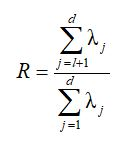

In [10]:
from IPython.core.display import Image, display
display(Image('resid.jpg'))

In [11]:
S=sum(eigvalues[:11])
print(S)

0.9101043995055268


In [59]:
lst = []
for i in range(len(index)):
    R = (S-sum(eigvalues[:index[i]]))/S
    lst.append(R*100)

#print(lst)

### Scree plot:

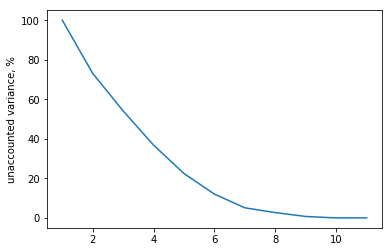

In [22]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],lst)
plt.ylabel('unaccounted variance, %')
plt.show()

### Compose the matrix Q of eigenvectors from eigvectors:

In [60]:
Q = np.matrix(eigvectors[index]); #Q

### Compute the $y_i = Q^T(x_i - m)$ vectors of the data points in the eigenspace:

In [61]:
y = Q.T*sdata; #y

### Keep the first $l$ components of the $y_i$ vectors:

In [62]:
y_hat = y[:7]; #y_hat

### Create a reduced dimensional $Q$ matrix, call it $\hat{Q}$, by copying the first $l$ eigenvectors from the original $Q$ to $\hat{Q}$:

In [63]:
Q_hat = np.matrix(Q[:,:7]); #Q_hat

In [56]:
x_hat = Q_hat*y_hat + mean; #x_hat

#### Compute the Frobenius norm of the difference between the original data points $x_i$ and the estimated data points $\hat{x_i}$:

In [57]:
la.norm(data-x_hat)

1.2201048218582433